### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 2-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:
- Semester: Spring 2024
- Instructor: Tom Bihari
- Section Wed/Fri 12:45PM
- Student Name: Ruoke Zhang
- Student Email: zhang.12783@osu.edu
- Student ID: 500622915

Based on CRISP-DM Template Version V11.

***
# Section: Overview
- In this exercise, I've conducted a thorough examination, analysis, and cleaning of the dataset at hand. The goal was to understand its structure, identify any inconsistencies or missing values, and refine the data to ensure it's primed for further analysis or modeling tasks. This process involved scrutinizing various attributes for outliers, checking the distribution of data points, and making decisions on how best to treat any anomalies found.
***

### Assignment Overview
In this assignment, you will analyze a copy of the “Regensburg Pediatric Appendicitis” dataset.
- This dataset was pulled from: https://archive.ics.uci.edu/datasets?search=Regensburg%20Pediatric%20Appendicitis
- Dataset citation: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7711412.svg)](https://doi.org/10.5281/zenodo.7711412)

This assignment covers **steps two and three of the six steps** of the **CRISP-DM process model** (Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be valuable when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Medical Analytics for Buckeye Medical Center (BMC).  BMC wants to improve its Pediatric Appendicitis management practices.
- BMC has obtained data on pediatric appendicitis cases handled by Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021.
- BMC leadership has asked your team to analyze the data, and determine if it is suitable for developing analyses and models that would be effective in improving the management of pediatric appendicitis cases at BMC.
- Based on this, BMC may make improvements to specific aspects of their services, with a goal of improving BAI's overall customer satisfaction.

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

**Assumption:** In the future, you will be creating a Classifiction model that predicts one or more of the "class" or "target" variables ('Management', 'Severity', 'Diagnosis').  For this assignment, assume you will be predicting the **Diagnosis** class variable.  You do not yet know the specific Classification algorithm or model you will use.  **That will come in a later assignment.**

### Things To Do
Complete **Sections 2 and 3** of CRISP-DM in this notebook (and the **Conclusion**). 
- **Data Understanding**: Perform Exploratory Data Analysis and gain an understanding of the contents and usefulness of the dataset. 
- **Data Preparation**: Clean up the data and save it for future use.

### Important Points
It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code), and comment your code, so others can understand and evaluate it.
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
#!pip install seaborn

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding - **SKIP THIS!**
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

**Stakeholders**
- Who are they?
- What are their needs?

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**Time / Cost**
- What is the deadline or budget?

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**Other Considerations**
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding - **DO THIS!**
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **You may choose to do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**
- Hint: Look at the "variable information" discussion below.

**Discussion:**

In this step, I create some useful variables, like non_numeric_attribute_names, which are the categorical attribute names for all the data.
And non_numeric_attribute_names_feature represents those categorical attributes only the features, not the targets.

### **Load the Dataset.**

In [2]:
# See the Import in Python button here: https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis
#   and see: https://github.com/uci-ml-repo/ucimlrepo

# Install this package (uncomment and run one time, then re-comment it out)
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
 
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 

In [4]:
# # Miscellaneous things you could do...

# # Get X and y data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 


#display(X)
# # Show metadata 
#display(regensburg_pediatric_appendicitis.metadata)

# # Show variable information 
display(regensburg_pediatric_appendicitis.variables)

,name,role,type,demographic,description,units,missing_values
0,Age,Feature,Continuous,Age,Obtained from the date of birth,years,yes
1,BMI,Feature,Continuous,None,Measures body fat; patient's weight divided by...,None,yes
2,Sex,Feature,Categorical,Sex,Registered gender,None,yes
3,Height,Feature,Continuous,None,Patient's height,None,yes
4,Weight,Feature,Integer,None,Patient's weight,None,yes
5,Length_of_Stay,Feature,Integer,None,Length of the stay in the hospital,None,yes
6,Management,Target,Categorical,None,"(conservative, primary surgical, secondary sur...",None,yes
7,Severity,Target,Categorical,None,"(uncomplicated, complicated) Severity of appen...",None,yes
8,Diagnosis_Presumptive,Other,Binary,None,Patient's suspected diagnosis,None,yes
9,Diagnosis,Target,Binary,None,"Patient's diagnosis, histologically confirmed ...",None,yes


In [5]:
# Get the full dataframe, for use in the rest of this workbook
data_df = regensburg_pediatric_appendicitis.data.original
data_df.head(200)

non_numeric_columns = data_df.select_dtypes(exclude=[np.number]).columns

non_numeric_attribute_names = non_numeric_columns.tolist()

numeric_columns = data_df.select_dtypes(include=[np.number]).columns

numeric_attribute_names = numeric_columns.tolist()


non_numeric_columns_feature = X.select_dtypes(exclude=[np.number]).columns

non_numeric_attribute_names_feature = non_numeric_columns_feature.tolist()

numeric_columns_feature = X.select_dtypes(include=[np.number]).columns

numeric_attribute_names_feature = numeric_columns_feature.tolist()



non_numeric_columns_target = y.select_dtypes(exclude=[np.number]).columns

non_numeric_attribute_names_target = non_numeric_columns_target.tolist()
display(X[non_numeric_attribute_names_feature])

,Sex,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Neutrophilia,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,female,yes,no,yes,yes,no,no,yes,no,++,+,no,no,normal,no,yes,no,yes,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,no,yes,yes,yes,no,no,yes,no,no,no,no,yes,normal,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,female,no,no,yes,yes,no,no,no,no,no,no,no,no,constipation,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,female,no,yes,yes,no,no,yes,yes,no,no,no,no,yes,normal,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,female,yes,no,yes,yes,yes,yes,yes,no,no,no,no,no,constipation,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,female,yes,yes,yes,no,no,no,yes,yes,NaN,NaN,NaN,no,diarrhea,local,yes,NaN,yes,no,raised,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,female,no,no,no,no,no,no,yes,yes,NaN,NaN,NaN,no,normal,local,no,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,yes,Douglas,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
779,female,no,no,yes,no,no,no,no,no,no,no,no,yes,normal,no,no,no,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig
780,male,yes,yes,yes,no,yes,yes,no,yes,+++,no,no,no,normal,local,no,no,yes,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,no,NaN,yes,NaN,no,NaN,NaN,NaN,NaN


**Discussion:**

age： Ratio
BMI： Ratio
Sex： Nominal
height: ratio
weight: ratio
Length_of_Stay: ratio
Management: Ordinal
Severity: ordinal
Diagnosis_Presumptive: Nominal
Diagnosis: Nominal
Alvarado_Score: Ordinal
Paedriatic_Appendicitis_Score: Ordinal
Appendix_on_US: Nominal
Appendix_Diameter: Ratio
Migratory_Pain: Nominal
Lower_Right_Abd_Pain: Nominal
Contralateral_Rebound_Tenderness: Nominal
Coughing_Pain: Nominal
Nausea: Nominal
Loss_of_Appetite: Nominal
Body_Temperature: Interval
WBC_Count: Ratio
Neutrophil_Percentage: Ratio
Segmented_Neutrophils: Ratio
Neutrophilia: Nominal
RBC_Count: Ratio
Hemoglobin: Ratio
RDW: Interval
Thrombocyte_Count: Ratio
Ketones_in_Urine: Ordinal
RBC_in_Urine: Ordinal
WBC_in_Urine: Ordinal
CRP: Ratio
US_Number: Ratio
Stool: Nominal
Dysuria: Nominal
Peritonitis: Nominal
Psoas_Sign: Nominal
Ipsilateral_Rebound_Tenderness: Nominal
US_Performed: Nominal
Free_Fluids: Nominal
Appendix_Wall_Layers: Nominal
Target_Sign: Nominal
Appendicolith: Nominal
Perfusion: Nominal
Perforation: Nominal
Surrounding_Tissue_Reaction: Nominal
Appendicular_Abscess: Nominal
Pathological_Lymph_Nodes: Nominal
Lymph_Nodes_Location: Nominal
Bowel_Wall_Thickening: Nominal
Conglomerate_of_Bowel_Loops: Nominal
Ileus: Nominal
Coprostasis: Nominal
Meteorism: Nominal
Enteritis: Nominal

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [6]:
data_df.describe() #calculates statistics for all numerical columns

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900,425.515789
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854,271.585211
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


**Discussion:**

The minimum age is 0， which is unlikely.
The minimum body temperature is 26.900000, which is impossible.
Maximum RDW Value is Too High: RDW values significantly outside the normal range could indicate data entry errors or extreme medical conditions. May identify those high value, and consider removing or replacing them.
Zero Value of CRP May Not Be an Outlier: CRP (C-Reactive Protein) levels can be zero or near zero in healthy individuals, indicating no inflammation.
The US_Number is not useful in the analysis, consider removing this feature.


***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

***
## Motivation
This is to see the distribution of categorical data.
***

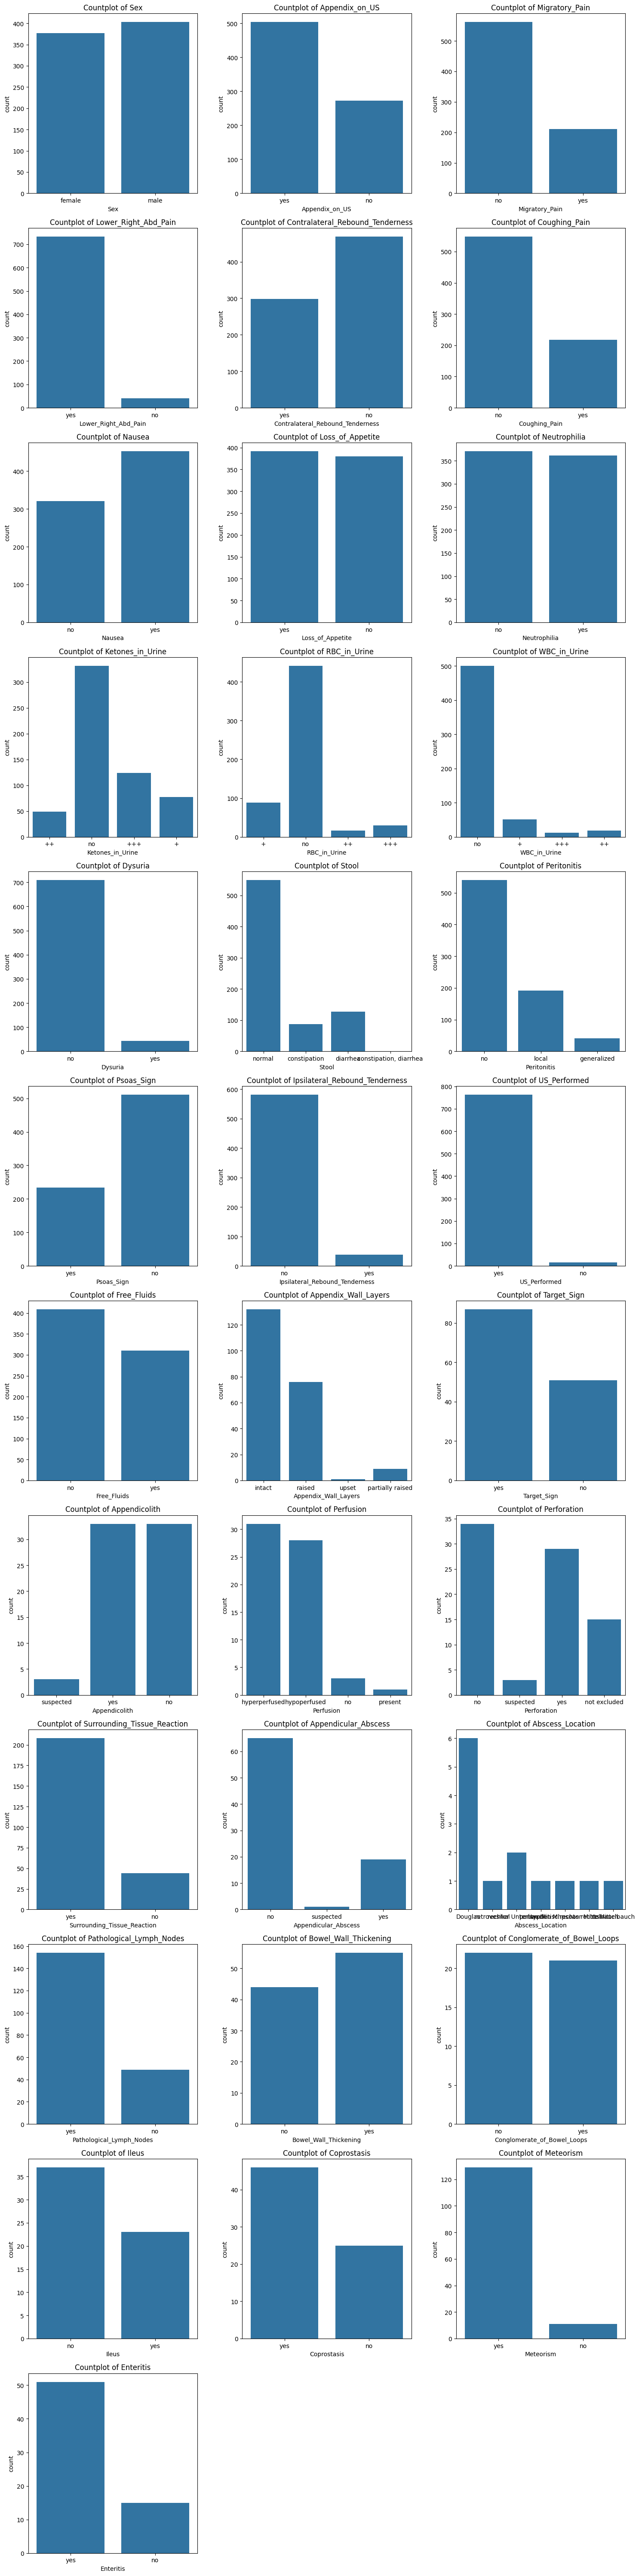

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


categorical_columns = X.select_dtypes(include=['object', 'category']).columns
columns_to_skip = ['Lymph_Nodes_Location', 'Gynecological_Findings']  # replace with columns to skip
columns_to_plot = [col for col in categorical_columns if col not in columns_to_skip]

# Calculate the number of rows needed to place 3 plots per row
num_rows = len(columns_to_plot) // 3 + (1 if len(columns_to_plot) % 3 else 0)

# Create a large figure to accommodate the subplots
plt.figure(figsize=(15, num_rows * 5))  # width of 15 inches, each row height of 5 inches

# Create subplots in a grid num_rows by 3
for index, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, 3, index + 1)  # (number of rows, number of columns, subplot index starting from 1)
    sns.countplot(x=column, data=X)
    plt.title(f'Countplot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**Discussion:**
We performed a count plot analysis for each categorical attribute in the dataset. It was observed that the distribution of female and male patients is nearly identical. 
A greater number of cases show the presence of an appendix on ultrasound (appendix_on_US), migratory pain, lower right abdominal pain, and nausea.
Conversely, symptoms like coughing pain, free fluids, and a positive psoas sign are less frequently observed in the patient population. This could potentially indicate common and less common symptoms or conditions in the context of the dataset's specific medical focus.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
- First, check the missing data and duplicate data.
***

In [8]:
# Check for missing values
missing_values = X.isnull().sum()

# Check for duplicate data
duplicate_data = X.duplicated().sum()

print("Missing Values:")
for index, value in missing_values.items():
    # Print out each column name with the number of missing values
    print(f"{index}: {value} missing")

print("\nDuplicate Rows:")
# Print the number of duplicate rows found
print(f"{duplicate_data} duplicates found")

Missing Values:
Age: 1 missing
BMI: 27 missing
Sex: 2 missing
Height: 26 missing
Weight: 3 missing
Length_of_Stay: 4 missing
Alvarado_Score: 52 missing
Paedriatic_Appendicitis_Score: 52 missing
Appendix_on_US: 5 missing
Appendix_Diameter: 284 missing
Migratory_Pain: 9 missing
Lower_Right_Abd_Pain: 8 missing
Contralateral_Rebound_Tenderness: 15 missing
Coughing_Pain: 16 missing
Nausea: 8 missing
Loss_of_Appetite: 10 missing
Body_Temperature: 7 missing
WBC_Count: 6 missing
Neutrophil_Percentage: 103 missing
Segmented_Neutrophils: 728 missing
Neutrophilia: 50 missing
RBC_Count: 18 missing
Hemoglobin: 18 missing
RDW: 26 missing
Thrombocyte_Count: 18 missing
Ketones_in_Urine: 200 missing
RBC_in_Urine: 206 missing
WBC_in_Urine: 199 missing
CRP: 11 missing
Dysuria: 29 missing
Stool: 17 missing
Peritonitis: 9 missing
Psoas_Sign: 37 missing
Ipsilateral_Rebound_Tenderness: 163 missing
US_Performed: 4 missing
Free_Fluids: 63 missing
Appendix_Wall_Layers: 564 missing
Target_Sign: 644 missing
Appen

**Discussion:**

There are many features with too many missing values, so I choose to delete the features with 50% or more missing values. If some features are important in predicting the outcome, I will keep them.

For the features with fewer missing values, I will do imputation for them.


In [9]:
threshold = 0.5  # 50% missing threshold

# Identify columns to drop where more than 50% of the data is missing
too_many_missing = X.columns[X.isnull().mean() > threshold]

display(too_many_missing)

# Identify columns to drop where less than 50% of the data is missing
fewer_missing = X.columns[X.isnull().mean() <= threshold]

display(fewer_missing)

Index(['Segmented_Neutrophils', 'Appendix_Wall_Layers', 'Target_Sign',
       'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings'],
      dtype='object')

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Neutrophilia', 'RBC_Count', 'Hemoglobin',
       'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids'],
      dtype='object')

**Discussion:**

Next, I will check the outlier.



Attribute: [ Age ]   Good Range: [ 1.8499999999999988 , 21.45 ]   Number of Outliers: [ 5 ]
Index           Value
  303           1.730
  405           0.850
  638           0.530
  676           0.040
  656           0.000


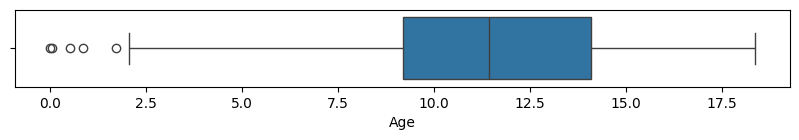


Attribute: [ BMI ]   Good Range: [ 7.542500000000004 , 29.362499999999997 ]   Number of Outliers: [ 23 ]
Index           Value
  636          38.160
   51          37.000
  503          35.490
  216          35.400
  464          35.380
   62          33.300
   17          33.100
  545          33.080
  417          32.370
  624          32.180
    1          31.900
  725          31.840
  508          31.380
  378          30.860
   64          30.800
  394          30.730
    5          30.700
  340          30.630
  472          30.440
  532          29.980
  316          29.940
   66          29.800
  134          29.800


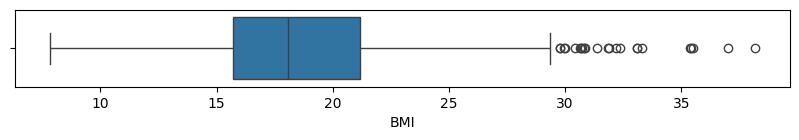


Attribute: [ Height ]   Good Range: [ 98.0 , 202.0 ]   Number of Outliers: [ 13 ]
Index           Value
  559          98.000
  529          97.000
  763          96.300
  140          96.000
  633          95.000
  397          94.600
  523          92.000
  580          92.000
  596          90.000
  719          90.000
  145          87.700
  303          83.500
  676          53.000


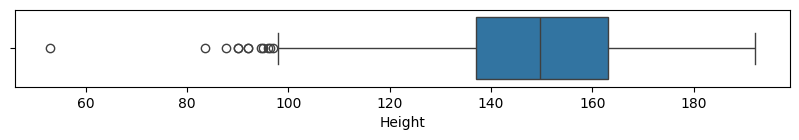


Attribute: [ Weight ]   Good Range: [ -7.25 , 90.75 ]   Number of Outliers: [ 8 ]
Index           Value
   64         103.000
  545          99.000
  624          98.000
   51          97.000
  508          95.000
  532          95.000
  770          94.100
  503          92.000


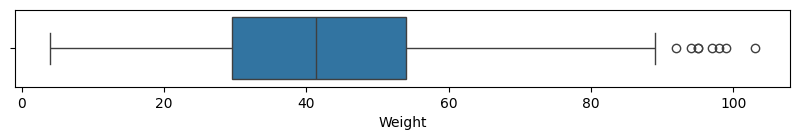


Attribute: [ Length_of_Stay ]   Good Range: [ 0.0 , 8.0 ]   Number of Outliers: [ 77 ]
Index           Value
  715          28.000
  545          21.000
  630          21.000
  522          20.000
  538          19.000
  644          17.000
  547          14.000
  563          14.000
  654          14.000
  503          13.000
  523          13.000
  546          12.000
  560          12.000
  566          12.000
  676          12.000
  488          11.000
  592          11.000
  696          11.000
  574          10.000
  575          10.000
  580          10.000
  648          10.000
  692          10.000
  706          10.000
  723          10.000
  731          10.000
  740          10.000
  139           9.000
  497           9.000
  525           9.000
  556           9.000
  561           9.000
  562           9.000
  593           9.000
  596           9.000
  601           9.000
  633           9.000
  664           9.000
  668           9.000
  690           9.000
  720     

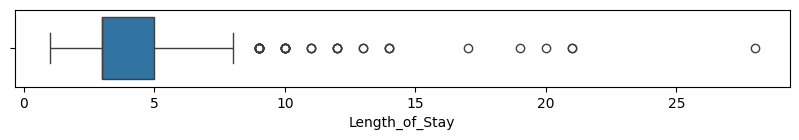


Attribute: [ Appendix_Diameter ]   Good Range: [ 1.3500000000000005 , 13.75 ]   Number of Outliers: [ 10 ]
Index           Value
  695          17.000
   55          15.000
  599          15.000
  699          15.000
  762          15.000
  508          14.000
  520          14.000
  589          14.000
  644          14.000
  780          14.000


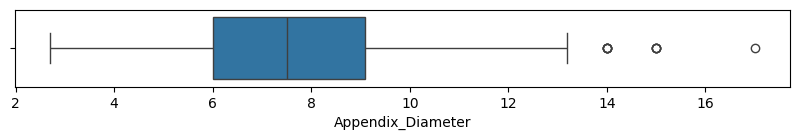


Attribute: [ Body_Temperature ]   Good Range: [ 35.14999999999999 , 39.55 ]   Number of Outliers: [ 12 ]
Index           Value
  704          40.200
  364          40.000
  592          40.000
  743          40.000
  431          39.900
  103          39.800
  719          39.800
  744          39.800
  235          39.700
  324          39.600
  523          39.600
  221          26.900


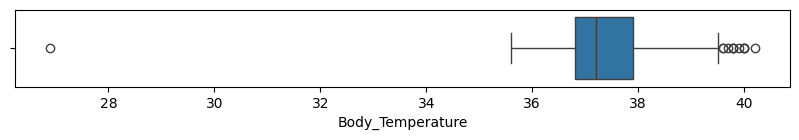


Attribute: [ WBC_Count ]   Good Range: [ -3.8000000000000007 , 28.2 ]   Number of Outliers: [ 7 ]
Index           Value
  563          37.700
   33          33.600
  763          33.300
  681          30.500
  693          29.900
  601          28.800
  400          28.200


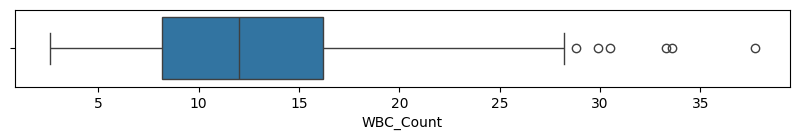


Attribute: [ Neutrophil_Percentage ]   Good Range: [ 28.1 , 116.89999999999999 ]   Number of Outliers: [ 1 ]
Index           Value
  249          27.200


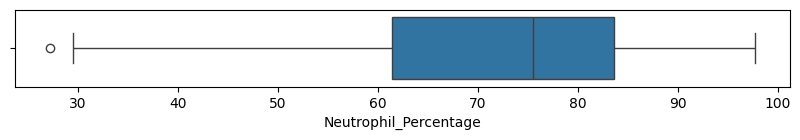


Attribute: [ RBC_Count ]   Good Range: [ 3.8137499999999998 , 5.7437499999999995 ]   Number of Outliers: [ 14 ]
Index           Value
  203          14.000
   72           6.440
  238           6.000
   95           5.990
  409           5.960
  516           5.940
  201           5.870
  279           5.810
  503           5.790
  220           5.770
  692           3.800
  640           3.790
  550           3.750
  715           3.620


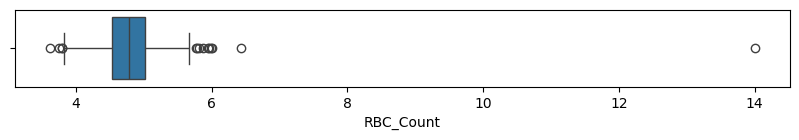


Attribute: [ Hemoglobin ]   Good Range: [ 10.5 , 16.1 ]   Number of Outliers: [ 18 ]
Index           Value
  564          36.000
  220          17.500
  753          16.600
  161          16.500
  503          16.500
  700          16.400
  217          16.300
  431          16.300
  434          16.300
  691          16.200
  121          16.100
  341          16.100
  633          10.300
   65          10.100
  238          10.000
  715          10.000
  529           9.700
  698           8.200


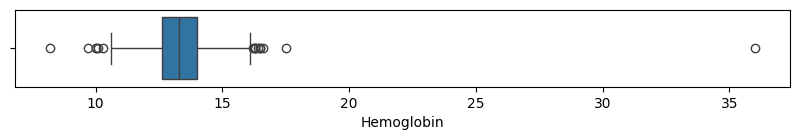


Attribute: [ RDW ]   Good Range: [ 10.8 , 14.8 ]   Number of Outliers: [ 26 ]
Index           Value
  586          86.900
  557          84.600
  541          79.200
  698          21.600
  238          18.700
  107          18.000
  290          16.500
  774          16.300
  529          16.100
   65          15.900
  562          15.700
  594          15.600
  488          15.300
  171          15.200
  259          15.200
  598          15.200
   42          15.100
  316          15.100
   72          15.000
  247          14.900
  310          14.900
  385          14.900
  469          14.900
  130          14.800
  409          14.800
  630          14.800


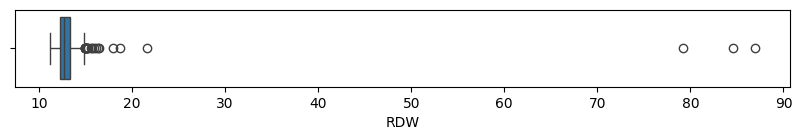


Attribute: [ Thrombocyte_Count ]   Good Range: [ 95.0 , 471.0 ]   Number of Outliers: [ 9 ]
Index           Value
  774         708.000
  524         546.000
  464         542.000
   62         531.000
  630         508.000
  310         497.000
  111         490.000
  561         473.000
  174          91.000


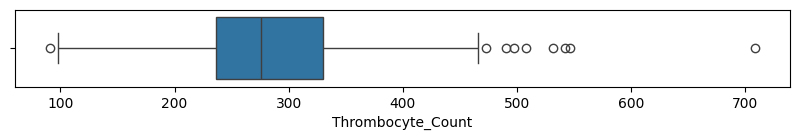


Attribute: [ CRP ]   Good Range: [ -47.0 , 81.0 ]   Number of Outliers: [ 87 ]
Index           Value
  644         365.000
  648         355.000
  541         353.000
  601         328.000
  560         323.000
  590         316.000
  546         306.000
  630         293.000
  667         278.000
  543         275.000
  778         245.000
  602         241.000
  693         236.000
  641         235.000
  673         234.000
  572         225.000
  551         224.000
  605         214.000
  570         210.000
  770         210.000
  516         205.000
  698         205.000
  744         203.000
  676         198.000
  743         198.000
  496         197.000
  615         197.000
  545         193.000
  484         192.000
  594         186.000
  637         185.000
  539         183.000
  759         181.000
  582         180.000
  645         178.000
  647         176.000
  579         173.000
  591         171.000
  486         167.000
  574         165.000
  651         165.

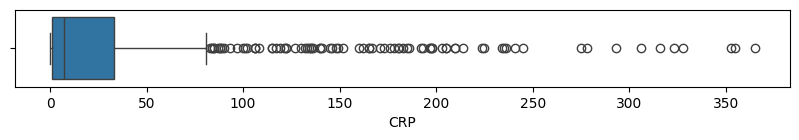

All Outlier Indices: []


In [10]:
numerical_attribute_names = data_df.select_dtypes(include=[np.number]).columns.tolist()

def find_outliers(df_in, att_name):
    quantile_low  = 0.25  # These are typical values, but you can set them as appropriate - see literature
    quantile_high = 0.75
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(quantile_low)
    Q3 = df_in[att_name].quantile(quantile_high)
    IQR = Q3-Q1
    good_range_low  = Q1 - multiplier * IQR
    good_range_high = Q3 + multiplier * IQR
    
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]

    if len(outlier_indices) > 0:
        outlier_value_list = []
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))

        plt.figure(figsize=(10,1))
        sns.boxplot(x=att_name, data=df_in)
        plt.show()
    
    return outlier_indices

outlier_indices = []


for att in numerical_attribute_names:
    outlier_indices = find_outliers(data_df, att)
    outlier_indices.extend(outlier_indices)
print(f"All Outlier Indices: {outlier_indices}")



**Discussion:**
Apparent outlier: RDW value>79, Hemoglobin value>30, RBC_Count>10, Body_Temperature<30, Age=0.000
These are impossible values for a living person, because there are only a few wrong records, we simply delete the whole rows.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

**Discussion:**
Categorical vs Categorical

First, Identify strong associations among categorical features

In [11]:

def find_chi2_high_associations(df, features, targets, threshold):
    associations = []
    for target in targets:
        for feature in features:
            if feature != target:  # Ensure we don't compare a feature with itself
                crosstab = pd.crosstab(df[feature], df[target])
                chi2, p, _, _ = chi2_contingency(crosstab)
                if p < threshold:
                    associations.append((feature, target, p))
    # Sort by p-value
    associations.sort(key=lambda x: x[2])
    return associations

# Identify and sort strong associations between features and targets
sorted_associations = find_chi2_high_associations(data_df, X[non_numeric_attribute_names_feature], X[non_numeric_attribute_names_feature], threshold=0.05)
print("Sorted strong associations:", sorted_associations)



Sorted strong associations: [('Loss_of_Appetite', 'Nausea', 3.2725413929484566e-25), ('Nausea', 'Loss_of_Appetite', 3.2725413929484566e-25), ('Ketones_in_Urine', 'Neutrophilia', 1.3325155335866694e-17), ('Neutrophilia', 'Ketones_in_Urine', 1.3325155335866788e-17), ('Peritonitis', 'Neutrophilia', 4.528077324678782e-15), ('Neutrophilia', 'Peritonitis', 4.528077324678782e-15), ('Neutrophilia', 'Nausea', 2.441416241222201e-14), ('Nausea', 'Neutrophilia', 2.441416241222201e-14), ('Appendix_on_US', 'Target_Sign', 2.714308280228243e-13), ('Target_Sign', 'Appendix_on_US', 2.714308280228254e-13), ('Appendicular_Abscess', 'Perforation', 1.6975281388494995e-10), ('Perforation', 'Appendicular_Abscess', 1.6975281388494995e-10), ('Psoas_Sign', 'Contralateral_Rebound_Tenderness', 5.942107364965118e-10), ('Contralateral_Rebound_Tenderness', 'Psoas_Sign', 5.942107364965118e-10), ('Ketones_in_Urine', 'Loss_of_Appetite', 8.389447908047159e-10), ('Loss_of_Appetite', 'Ketones_in_Urine', 8.389447908047159e-

Then, list all the categorical features that's highly related to the targets, the threshold is set to 0.05.
I also list some features that are useless in predicting, the threshold is set to 0.05.

In [12]:
# Identify and sort strong associations between features and targets
sorted_associations = find_chi2_high_associations(data_df, X[non_numeric_attribute_names_feature], data_df[non_numeric_attribute_names_target], threshold=0.05)
print("Sorted strong associations:", sorted_associations)

def find_chi2_low_associations(df, features, targets, threshold):
    associations = []
    for target in targets:
        for feature in features:
            if feature != target:  # Ensure we don't compare a feature with itself
                crosstab = pd.crosstab(df[feature], df[target])
                chi2, p, _, _ = chi2_contingency(crosstab)
                if p > threshold:
                    associations.append((feature, target, p))
    # Sort by p-value
    associations.sort(key=lambda x: -x[2])
    return associations
    
# Identify and sort low associations between features and targets
sorted_associations = find_chi2_low_associations(data_df, X[non_numeric_attribute_names_feature], data_df[non_numeric_attribute_names_target], threshold=0.05)
print("\nSorted low associations:", sorted_associations)


Sorted strong associations: [('Peritonitis', 'Management', 1.088275232583497e-56), ('Appendix_on_US', 'Diagnosis', 1.0792264611697226e-33), ('Peritonitis', 'Diagnosis', 3.136009815331413e-24), ('Peritonitis', 'Severity', 5.26023064893613e-22), ('Neutrophilia', 'Management', 6.246545271780927e-20), ('Neutrophilia', 'Diagnosis', 2.4912396260195684e-16), ('Free_Fluids', 'Management', 1.1916778251096878e-13), ('Appendix_Wall_Layers', 'Management', 3.764103364747479e-13), ('Neutrophilia', 'Severity', 1.149506377928734e-12), ('Appendix_Wall_Layers', 'Severity', 9.02158746392466e-10), ('Nausea', 'Severity', 9.659504977838677e-10), ('Surrounding_Tissue_Reaction', 'Management', 1.0784180069880146e-09), ('Ketones_in_Urine', 'Management', 1.3762814430503263e-09), ('Target_Sign', 'Diagnosis', 2.9494535583235577e-09), ('Free_Fluids', 'Severity', 3.1859065370779168e-09), ('Ketones_in_Urine', 'Severity', 3.9166912394916146e-09), ('Loss_of_Appetite', 'Severity', 5.212306466643303e-09), ('Free_Fluids',

Peritonitis, Appendix_on_US, Neutrophilia, Free_Fluids are extremly helpful in predicting, consider assign them with more weights.
WBC_in_Urine, RBC_in_Urine seems useless in predicting, consider removing them.

Next, I analyze relationships among numerical features.

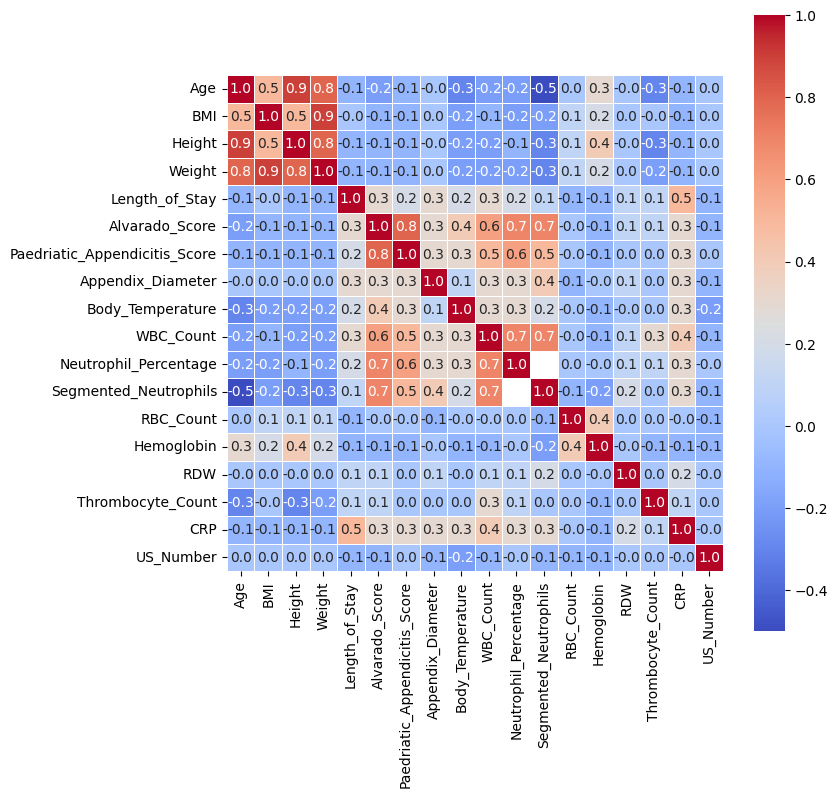

In [13]:
cor = data_df[numeric_attribute_names].corr(method='pearson').round(1)
plt.figure(figsize=(8,8))

# Draw the heatmap
sns.heatmap(cor, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='coolwarm')

# Show the plot
plt.show()


**Discussion**
Age and height are highly related, since age is more important, we want to delete height.
BMI is also highly related to weight, so we want to delete weight.
alvarado_score and paedriatic_appendictis_score are related, we may combine these two features as a new feature.

Next, I will check the relationship between categorical features and numerical features.
I want to determine if there are any numerical features that are highly related to the targets.

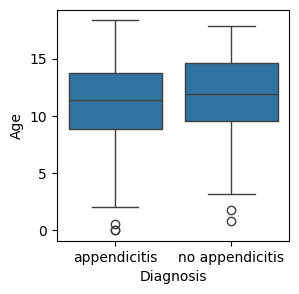

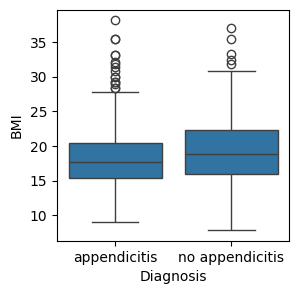

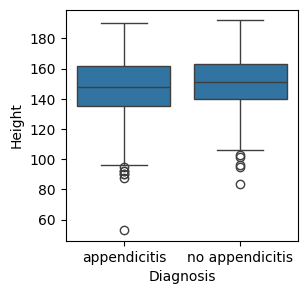

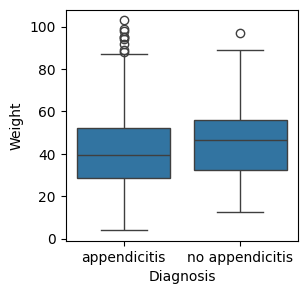

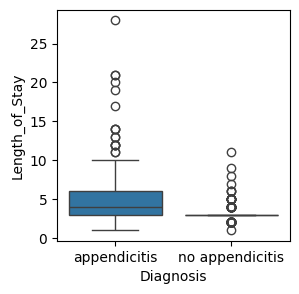

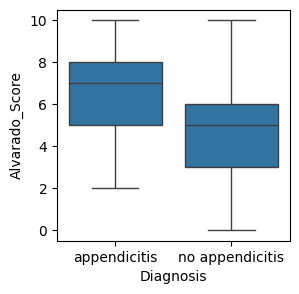

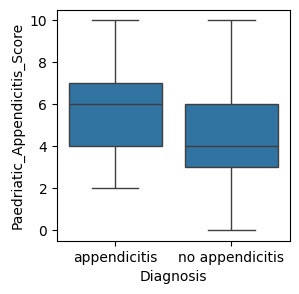

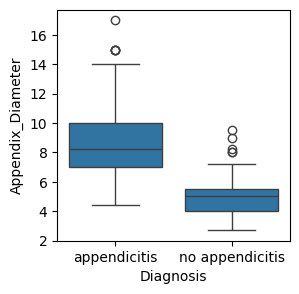

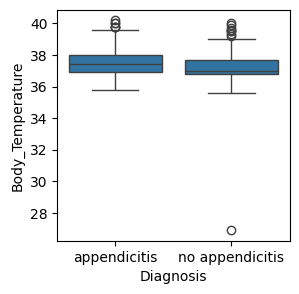

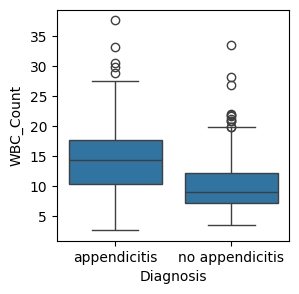

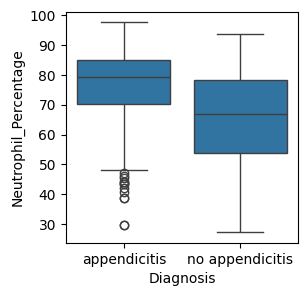

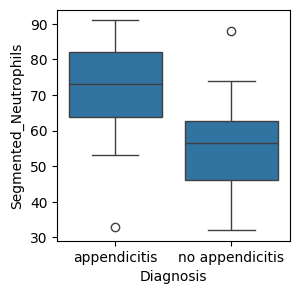

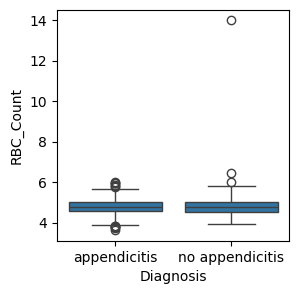

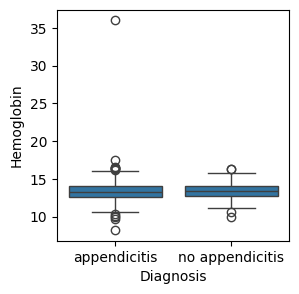

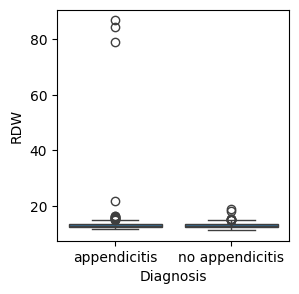

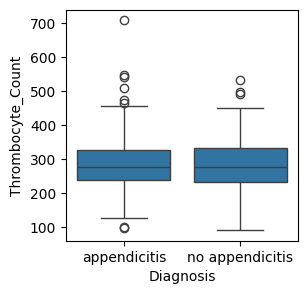

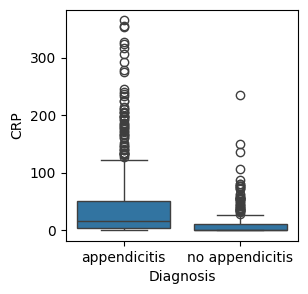

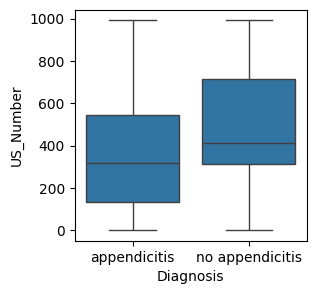

In [14]:
# Visualize the relationship between a specific categorical variable (the class variable in this case)
#   and all numerical variables.  (Violin plots work nicely too.)
for f in numerical_attribute_names:
    plt.figure(figsize=(3,3))
    sns.boxplot(x="Diagnosis", y=f, data=data_df)

**Discussion:**
Appendix_Diameter, Segmented_Neutrophils, CRP, WBC_Count is helpful to predict diagnosis.
RBC_Count, Hempohlobin, RDW, Thrombocyte_Count is not helpful

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

**Discussion:**

In section 2.5, though some categorical attributes seem to be highly correlated, I decided not to delete them.
Without domain expertise, it can be challenging to understand the implications of removing certain attributes. Some features may seem irrelevant but are actually important in the specific context of the problem.

***
# Section: 3 - Data Preparation - **DO THIS!**
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
1. Remove outliers
2. Imputation for missing values
***

In [15]:
# Define the conditions
conditions = (
    (data_df['RDW'] > 79) |
    (data_df['Hemoglobin'] > 30) |
    (data_df['RBC_Count'] > 10) |
    (data_df['Body_Temperature'] < 30) |
    (data_df['Age'] == 0.000)
)

# Remove rows where any of the conditions are met
cleaned_data_df = data_df[~conditions]

cleaned_data_df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,...,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,...,no,normal,no,yes,no,yes,882.0,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,...,yes,normal,no,yes,no,yes,883.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,...,no,constipation,no,yes,no,yes,884.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,...,yes,normal,no,yes,no,yes,886.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,...,no,constipation,no,yes,no,yes,887.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


Then handle the fewer missing features. We will use the average value, or use linear regression model to calculate a value to fill in the blank.

In [16]:
# Identify columns to drop where less than 50% of the data is missing
fewer_missing = X.columns[X.isnull().mean() <= threshold]

display(fewer_missing)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US',
       'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Neutrophilia', 'RBC_Count', 'Hemoglobin',
       'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids'],
      dtype='object')


We want to combine Alvarado_Score and Paediatric_Appendicitis_Score, so simply replace missing values using the other.
For Age, BMI, inferred them using Height and Weight
Length_of_Stay, Appendix_on_US, Migratory_Pain, Appendix_Diameter, Lower_Right_Abd_Pain, 'Coughing_Pain', Body_Temperature', Hemoglobin, 

We have identified some highly-related numerical features, we use linear regression to calculate a value to replace the missing one.

In [17]:
# Define the pairs of attributes you want to impute
pairs_to_impute = [
    ('Neutrophil_Percentage', 'WBC_Count'),
    ('WBC_Count', 'Segmented_Neutrophils'),
    ('Alvarado_Score', 'Segmented_Neutrophils'),
    ('Alvarado_Score', 'WBC_Count'),
    ('Height', 'Weight')
]

# Loop over each pair and perform the imputation
for target, predictor in pairs_to_impute:
    # Step 1: Split the data
    train_data = data_df.dropna(subset=[target, predictor])
    predict_data = data_df[data_df[target].isnull() & data_df[predictor].notnull()]

    # Ensure there is data to train on and predict
    if not train_data.empty and not predict_data.empty:
        # Step 2: Train the model
        model = LinearRegression()
        model.fit(train_data[[predictor]], train_data[target])

        # Step 3: Predict the missing values
        predicted_values = model.predict(predict_data[[predictor]])

        # Step 4: Fill in the missing values
        data_df.loc[data_df[target].isnull() & data_df[predictor].notnull(), target] = predicted_values

# Print out the first few rows of the dataframe to verify the changes
data_df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,...,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,...,no,normal,no,yes,no,yes,882.0,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,...,yes,normal,no,yes,no,yes,883.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,...,no,constipation,no,yes,no,yes,884.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,...,yes,normal,no,yes,no,yes,886.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,...,no,constipation,no,yes,no,yes,887.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [18]:
data_df['BMI_calculated'] = data_df['Weight'] / (data_df['Height'] ** 2)

# Fill missing BMI values with the calculated BMI
data_df['BMI'] = data_df['BMI'].fillna(data_df['BMI_calculated'])

# Drop the temporary 'BMI_calculated' and 'Height_m' columns
data_df.drop(['BMI_calculated'], axis=1, inplace=True)

In [19]:
# Check for missing numeric values
missing_values = data_df.isnull().sum()

threshold = 0.5
fewer_missing = data_df.columns[data_df.isnull().mean() <= threshold]
print("Missing Values:")

for index, value in missing_values.items():
    # Print out each column name with the number of missing values
    print(f"{index}: {value} missing\n")

display(fewer_missing)

Missing Values:
Age: 1 missing

BMI: 3 missing

Sex: 2 missing

Height: 3 missing

Weight: 3 missing

Length_of_Stay: 4 missing

Management: 1 missing

Severity: 1 missing

Diagnosis_Presumptive: 2 missing

Diagnosis: 2 missing

Alvarado_Score: 6 missing

Paedriatic_Appendicitis_Score: 52 missing

Appendix_on_US: 5 missing

Appendix_Diameter: 284 missing

Migratory_Pain: 9 missing

Lower_Right_Abd_Pain: 8 missing

Contralateral_Rebound_Tenderness: 15 missing

Coughing_Pain: 16 missing

Nausea: 8 missing

Loss_of_Appetite: 10 missing

Body_Temperature: 7 missing

WBC_Count: 6 missing

Neutrophil_Percentage: 6 missing

Segmented_Neutrophils: 728 missing

Neutrophilia: 50 missing

RBC_Count: 18 missing

Hemoglobin: 18 missing

RDW: 26 missing

Thrombocyte_Count: 18 missing

Ketones_in_Urine: 200 missing

RBC_in_Urine: 206 missing

WBC_in_Urine: 199 missing

CRP: 11 missing

Dysuria: 29 missing

Stool: 17 missing

Peritonitis: 9 missing

Psoas_Sign: 37 missing

Ipsilateral_Rebound_Tenderne

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Neutrophilia', 'RBC_Count', 'Hemoglobin',
       'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'US_Number',
       'Free_Fluids'],
      dtype='object')

Since we need to combine Alvarado_Score and Paediatric_Appendicitis_Score later, we use the other one to fill in the blank

In [20]:
# If Alvarado_Score is NaN, replace it with the corresponding Paediatric_Appendicitis_Score and vice versa

# First, we check if both scores are not NaN to avoid overwriting non-missing data
data_df['Alvarado_Score'] = np.where(data_df['Alvarado_Score'].isnull() & data_df['Paedriatic_Appendicitis_Score'].notnull(),
                                data_df['Paedriatic_Appendicitis_Score'], data_df['Alvarado_Score'])

data_df['Paedriatic_Appendicitis_Score'] = np.where(X['Paedriatic_Appendicitis_Score'].isnull() & data_df['Alvarado_Score'].notnull(),
                                               data_df['Alvarado_Score'], data_df['Paedriatic_Appendicitis_Score'])

**Discussion:**

We can see less std, and no obvious outlier(zero value)

***
## Section: 3.2 - Select Attributes

- For high correlation, remove weight, Height.
- For too much missing data, Remove Appendix Diameter, Segmented Neutrophils, Ketones in Urine, RBC in Urine, WBC in Urine, Appendix Wall Layers, Target Sign, Appendicolith, Perfusion, Perforation, Reaction of Surrounding Tissue, Ipsilateral Rebound Tenderness, Appendicular Abscess, Location of Abscess, Pathological Lymph Nodes, Location of Lymph Nodes, Bowel Wall Thickening, Conglomerate of Bowel Loops, Ileus, Coprostasis, Meteorism, Enteritis, and Gynecological Findings.
- `Migratory_Pain` is less predictive than `Lower_Right_Abd_Pain`, so remove `Migratory_Pain`
- `Psoas_Sign` is not that predictive, remove it
- Some attributes may seem to have little impact individually but may significantly contribute to the model's performance when combined with other features. Complex interactions between features are often not apparent without in-depth analysis and could be lost if features are removed prematurely. So I didn't delete some highly related features.
***

In [21]:
columns_to_keep = [
    'Peritonitis', 'Appendix_on_US', 'Neutrophilia', 'Free_Fluids',
    'Appendix_Diameter', 'Segmented_Neutrophils', 'CRP', 'WBC_Count'
]

# Define columns to remove directly, not considering the columns to keep
columns_to_remove_directly = ['RBC_in_Urine', 'WBC_in_Urine', 'US_Number', 'Height', 'Weight',
                             'US_Performed', 'Migratory_Pain', 'Psoas_Sign']

# Filter out the columns to keep from both lists
columns_to_remove = set(too_many_missing).union(set(columns_to_remove_directly)).difference(set(columns_to_keep))

# Remove specified columns from the DataFrame
data_df.drop(columns=list(columns_to_remove), inplace=True)

print(f"Columns removed: {columns_to_remove}")


Columns removed: {'Pathological_Lymph_Nodes', 'Appendicolith', 'Appendix_Wall_Layers', 'Surrounding_Tissue_Reaction', 'Perfusion', 'Ileus', 'Coprostasis', 'Height', 'US_Performed', 'Lymph_Nodes_Location', 'Conglomerate_of_Bowel_Loops', 'WBC_in_Urine', 'Migratory_Pain', 'US_Number', 'Weight', 'Bowel_Wall_Thickening', 'Gynecological_Findings', 'Psoas_Sign', 'Abscess_Location', 'Perforation', 'Appendicular_Abscess', 'Target_Sign', 'Meteorism', 'RBC_in_Urine', 'Enteritis'}


In [22]:
data_df.describe()

,Age,BMI,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,781.000000,779.000000,778.000000,776.000000,776.000000,498.000000,775.000000,776.000000,776.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000
mean,11.346451,18.324567,4.284062,5.906596,5.277730,7.762651,37.404516,12.670683,71.655163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.529909,5.415128,2.574057,2.116131,1.928533,2.536671,0.903678,5.366525,13.972108,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854
min,0.000000,0.001235,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.200000,15.490000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.478483,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000
50%,11.440000,17.800000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,74.900000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000
75%,14.100000,21.025000,5.000000,8.000000,6.818151,9.100000,37.900000,16.200000,83.100000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000
max,18.360000,38.160000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000


In [23]:
data_df.head(5)

,Age,BMI,Sex,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,CRP,Dysuria,Stool,Peritonitis,Ipsilateral_Rebound_Tenderness,Free_Fluids
0,12.68,16.9,female,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,0.0,no,normal,no,no,no
1,14.10,31.9,male,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,5.26,15.7,12.7,151.0,no,3.0,yes,normal,no,no,no
2,14.14,23.3,female,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,3.98,11.4,12.2,300.0,no,3.0,no,constipation,no,no,no
3,16.37,20.6,female,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,4.64,13.6,13.2,258.0,no,0.0,yes,normal,no,no,no
4,11.08,16.9,female,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,0.0,no,constipation,no,no,no


**Discussion:**

Here we get fewer columns, with each performs a good prediction to the targets.


***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

Combine Alvarado_Score and Paedriatic_Appendictis_Score.
From section 2.5, we know that Alvarado_Score is more useful in predicting the target. So we assign more weights to Alvarado_Score

In [24]:
data_df['Combined_Score_Weighted'] = (3 * data_df['Alvarado_Score'] + 2*data_df['Paedriatic_Appendicitis_Score']) / 5
data_df.drop(columns=['Alvarado_Score', 'Paedriatic_Appendicitis_Score'], inplace=True)

data_df.head(1)

,Age,BMI,Sex,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,Appendix_on_US,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,CRP,Dysuria,Stool,Peritonitis,Ipsilateral_Rebound_Tenderness,Free_Fluids,Combined_Score_Weighted
0,12.68,16.9,female,3.0,conservative,uncomplicated,appendicitis,appendicitis,yes,7.1,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,0.0,no,normal,no,no,no,3.6


***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

I choose not to do this step. We're using standard units of measure of all numerical features.

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

I choose not to do this step. The size of the dataset, which comprises just over 700 individual records. This amount is not considered excessively large for the types of analyses intended to be performed.

Furthermore, the distribution of ages within the dataset is relatively concentrated, suggesting that the current sample size is well-suited to capture the population's characteristics without the need for reduction. 

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**

I won't do this step due to a lack of domain-specific knowledge necessary for advanced data optimization without risking data integrity. Additionally, the dataset is already of a manageable size and complexity, making further optimization unnecessary. 

***
# Section: 4 - Modeling - **SKIP THIS!**
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation - **SKIP THIS!**
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment - **SKIP THIS!**
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions - **DO THIS!**
- What did you learn from this exercise?
***

**Discussion:**

From this exercise, I get familiar of the data's type, and methods to identify any missing data or duplicate data.
I also know how to check the relationships among all the features, and use different methods for comparing various types of data.
For those highly linearly related features, I use linear regression between two features, to get new values for the missing value.

Also, I have an idea of create a new feature, this is to have a more useful feature.